# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Pustaka Utama
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Utilitas
import os
from google.colab import files

# Pengaturan Tambahan
# Mengatur gaya visualisasi
sns.set_style('whitegrid')
# Mengatur agar Pandas menampilkan semua kolom
pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

Bagian ini bertanggung jawab untuk menyiapkan data. Prosesnya mencakup instalasi pustaka yang diperlukan, otentikasi aman ke Kaggle API, mengunduh dataset, mengekstraknya, dan memuatnya ke dalam DataFrame Pandas.

In [ ]:
# Menginstal library Kaggle menggunakan pip.
# Opsi -q (quiet) digunakan untuk mengurangi output teks selama instalasi,
# membuat notebook kita lebih bersih.
print("Menginstal pustaka Kaggle...")
!pip install -q kaggle
print("Instalasi selesai.")

Menginstal pustaka Kaggle...
Instalasi selesai.


In [ ]:
# Meminta pengguna untuk mengunggah file kaggle.json
print("Harap unggah file 'kaggle.json' Anda untuk otentikasi.")
# Perintah ini akan memunculkan dialog untuk memilih file dari komputer Anda.
uploaded = files.upload()

# Memastikan file berhasil diunggah sebelum melanjutkan
if 'kaggle.json' in uploaded:
    print("File 'kaggle.json' berhasil diunggah.")

    # Membuat direktori .kaggle yang tersembunyi, tempat library Kaggle mencari file token.
    # Opsi -p (parents) akan membuat direktori induk jika belum ada.
    !mkdir -p ~/.kaggle

    # Memindahkan file token ke direktori yang benar.
    !cp kaggle.json ~/.kaggle/

    # Mengatur izin akses file. Ini adalah langkah keamanan yang WAJIB.
    # 'chmod 600' berarti hanya pemilik file (yaitu, sesi Colab Anda) yang
    # dapat membaca dan menulis file ini.
    !chmod 600 ~/.kaggle/kaggle.json

    print("Konfigurasi token Kaggle telah selesai.")
else:
    print("Gagal menemukan 'kaggle.json'. Harap jalankan sel ini lagi dan unggah file yang benar.")

Harap unggah file 'kaggle.json' Anda untuk otentikasi.


Saving kaggle.json to kaggle.json
File 'kaggle.json' berhasil diunggah.
Konfigurasi token Kaggle telah selesai.


In [ ]:
# Nama dataset sesuai dengan URL di Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
dataset_name = 'mlg-ulb/creditcardfraud'
zip_file_name = 'creditcardfraud.zip'

print(f"Mengunduh dataset '{dataset_name}'...")
# Menggunakan perintah CLI Kaggle untuk mengunduh dataset.
!kaggle datasets download -d {dataset_name}

print(f"Mengekstrak file '{zip_file_name}'...")
# Mengekstrak file zip. Opsi -o menimpa file tanpa bertanya, -q untuk mode senyap.
!unzip -oq {zip_file_name}

# Membersihkan lingkungan dengan menghapus file zip yang sudah tidak diperlukan.
if os.path.exists(zip_file_name):
    os.remove(zip_file_name)
    print(f"File '{zip_file_name}' telah dihapus untuk menjaga kebersihan.")

print("Proses unduh dan ekstrak selesai.")

Mengunduh dataset 'mlg-ulb/creditcardfraud'...
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.38GB/s]
Mengekstrak file 'creditcardfraud.zip'...
File 'creditcardfraud.zip' telah dihapus untuk menjaga kebersihan.
Proses unduh dan ekstrak selesai.


In [ ]:
# Nama file CSV yang diharapkan setelah ekstraksi
csv_file_name = 'creditcard.csv'

print(f"Memuat data dari '{csv_file_name}' ke dalam DataFrame...")
try:
    # Membaca file CSV ke dalam DataFrame bernama 'df'
    df = pd.read_csv(csv_file_name)
    print("Data berhasil dimuat!")
    print(f"Dataset terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom.")

    # Menampilkan 5 baris pertama untuk verifikasi cepat
    print("Berikut adalah cuplikan data Anda:")
    display(df.head())

except FileNotFoundError:
    print(f"KESALAHAN: File '{csv_file_name}' tidak ditemukan. Pastikan proses unduh dan ekstrak berhasil.")

Memuat data dari 'creditcard.csv' ke dalam DataFrame...
Data berhasil dimuat!
Dataset terdiri dari 284807 baris dan 31 kolom.
Berikut adalah cuplikan data Anda:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **4. Exploratory Data Analysis (EDA)**

Fase ini adalah tentang investigasi. Kita akan membedah dataset untuk memahami strukturnya, menemukan pola, mengidentifikasi anomali, dan yang terpenting, mengumpulkan wawasan yang akan memandu keputusan kita di tahap preprocessing dan pemodelan.

In [ ]:
# Menampilkan informasi ringkas tentang DataFrame.
# Ini memberi tahu kita tentang jumlah entri, jumlah kolom, tipe data per kolom,
# dan jumlah nilai non-null.
print("Informasi Struktural DataFrame")
df.info()

# Memeriksa secara eksplisit apakah ada nilai yang hilang di seluruh dataset.
missing_values_count = df.isnull().sum().sum()
print(f"\nJumlah total nilai yang hilang (missing values) di seluruh dataset: {missing_values_count}")

Informasi Struktural DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 no

Bagaimana distribusi antara transaksi valid dan fraud? Apa implikasinya?

Distribusi Kelas:
Class
0    284315
1       492
Name: count, dtype: int64

Persentase Transaksi Fraud: 0.1727%


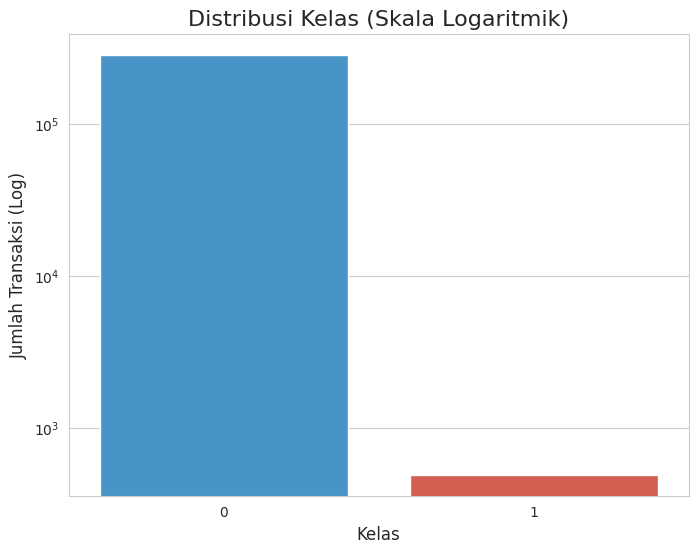

In [ ]:
# Menghitung dan memvisualisasikan distribusi kelas target.
# Ini adalah analisis terpenting dalam proyek ini.
fraud_percentage = df['Class'].value_counts(normalize=True)[1] * 100

print(f"Distribusi Kelas:\n{df['Class'].value_counts()}")
print(f"\nPersentase Transaksi Fraud: {fraud_percentage:.4f}%")

plt.figure(figsize=(8, 6))
sns.countplot(
    x='Class',
    data=df,
    hue='Class',
    palette=['#3498db', '#e74c3c'],
    legend=False
)
plt.yscale('log') # <-- Tambahkan baris ini untuk mengubah skala Y
plt.title('Distribusi Kelas (Skala Logaritmik)', fontsize=16)
plt.ylabel('Jumlah Transaksi (Log)', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.show()

Visualisasi di atas menggunakan **skala logaritmik** pada sumbu Y. Pendekatan ini sangat penting karena memungkinkan kita untuk melihat dan membandingkan kedua kelas (Valid dan Fraud) secara bersamaan, meskipun jumlahnya sangat berbeda secara magnitudo.

**Insight Utama yang Diperoleh:**

1.  **Konfirmasi Ketidakseimbangan Ekstrem:** Grafik ini secara visual mengonfirmasi apa yang angka tunjukkan: adanya **Ketidakseimbangan Kelas yang Ekstrem (*Extreme Class Imbalance*)**. Terdapat **284,315** transaksi valid (Kelas 0) berbanding hanya **492** transaksi fraud (Kelas 1), atau sekitar **0.17%** dari total data.

2.  **Implikasi Kritis untuk Proyek:** Temuan ini adalah *insight* paling krusial dari tahap EDA. Karakteristik data ini secara langsung akan memandu strategi kita ke depan, terutama dalam hal:
    * **Metrik Evaluasi:** Kita tidak bisa mengandalkan akurasi. Fokus utama kita harus pada metrik **Precision, Recall, dan AUC-PR** yang lebih sensitif terhadap kelas minoritas.
    * **Strategi Pemodelan:** Kita wajib menggunakan teknik penanganan ketidakseimbangan (contoh: `class_weight='balanced'` atau `scale_pos_weight`) untuk memastikan model kita belajar mengenali pola fraud dan tidak hanya "malas" menebak kelas mayoritas.

Dengan pemahaman yang solid mengenai tantangan utama ini, kita dapat melanjutkan investigasi ke fitur-fitur individual untuk mencari sinyal prediktif.

Apakah ada pola yang bisa kita lihat dari waktu dan jumlah transaksi yang membedakan fraud dan non-fraud?

Bagaimana dengan jumlah nominalnya? Apakah transaksi fraud cenderung besar atau kecil?

In [ ]:
print("Statistik Deskriptif untuk 'Amount' berdasarkan Kelas")
pd.set_option('display.float_format', '{:.2f}'.format) # Format angka agar lebih mudah dibaca
display(df.groupby('Class')['Amount'].describe())

Statistik Deskriptif untuk 'Amount' berdasarkan Kelas


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.00,88.29,250.11,0.00,5.65,22.00,77.05,25691.16
1,492.00,122.21,256.68,0.00,1.00,9.25,105.89,2125.87


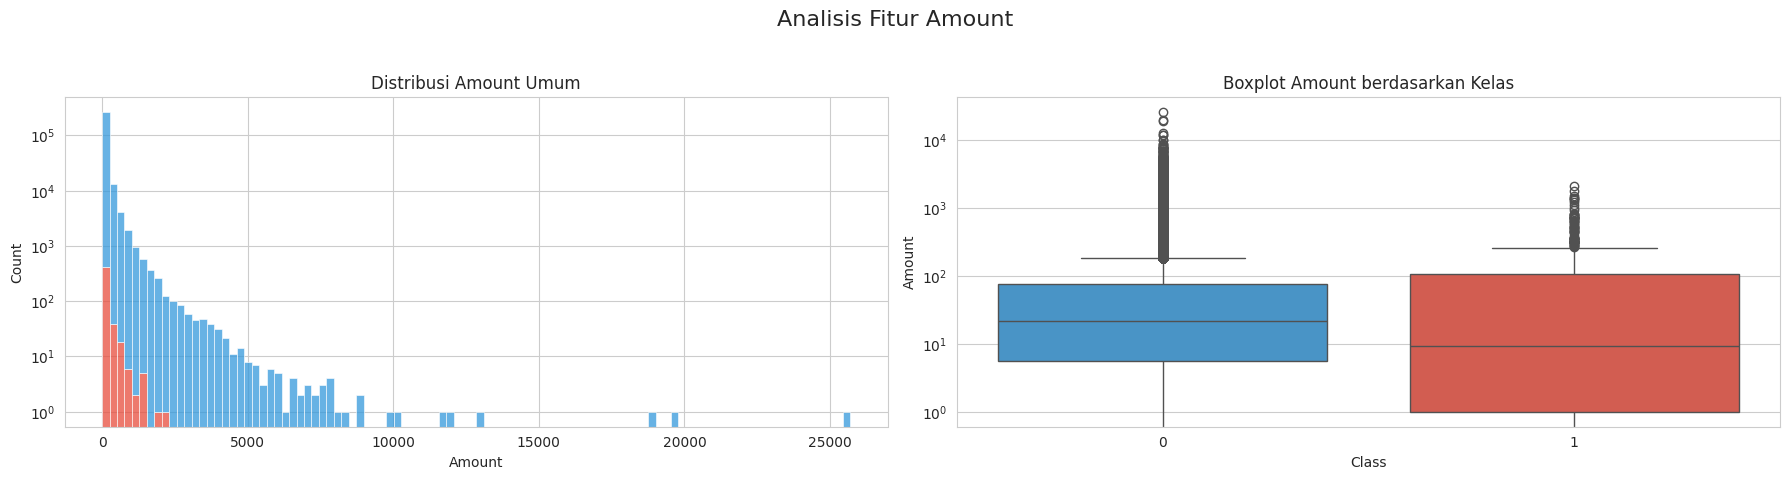

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Histogram untuk perbandingan umum
sns.histplot(data=df, x='Amount', hue='Class', bins=100, ax=axes[0], palette=['#3498db', '#e74c3c'], multiple="stack", legend=False)
axes[0].set_title('Distribusi Amount Umum')
axes[0].set_yscale('log') # Gunakan log scale untuk melihat lebih jelas

# Plot 2: Boxplot untuk melihat sebaran dan outlier
sns.boxplot(data=df, x='Class', y='Amount',hue='Class', palette=['#3498db', '#e74c3c'], legend=False)
axes[1].set_title('Boxplot Amount berdasarkan Kelas')
axes[1].set_yscale('log') # Log scale juga sangat membantu di sini

plt.suptitle('Analisis Fitur Amount', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dua grafik di atas—sebuah histogram dan sebuah boxplot—memberikan kita pandangan mendalam mengenai bagaimana fitur `Amount` (jumlah nominal transaksi) berperilaku untuk kedua kelas (Valid dan Fraud). Penggunaan skala logaritmik pada sumbu-Y membantu kita melihat detail yang tersembunyi.

**Analisis Grafik Histogram (Kiri):**

* Grafik ini menunjukkan distribusi frekuensi transaksi. Tumpukan bar biru (Valid) tersebar di seluruh rentang nilai, meskipun mayoritas terkonsentrasi di nilai yang rendah.
* Sebaliknya, bar merah (Fraud) hampir secara eksklusif terkonsentrasi pada **nilai `Amount` yang sangat rendah**. Sangat sedikit transaksi fraud yang memiliki nominal besar. Ini adalah petunjuk visual pertama kita bahwa perilaku transaksi fraud berbeda.

**Analisis Grafik Boxplot (Kanan):**

Boxplot memberikan konfirmasi statistik yang lebih kuat terhadap temuan dari histogram.

* **Median (Garis Tengah Kotak):** Median untuk kedua kelas berada pada level yang relatif rendah. Ini menandakan bahwa setengah dari semua transaksi (baik valid maupun fraud) bernilai kecil.
* **Sebaran & Batas Atas (IQR & Outliers):** Ini adalah *insight* yang paling penting. Perhatikan "kumis" (whisker) dan titik-titik outlier pada boxplot. Untuk transaksi valid (Kelas 0), outlier dapat mencapai nilai yang sangat tinggi (di atas 10^4 atau 10,000). Namun, untuk transaksi fraud (Kelas 1), sebaran dan outlier-nya **berhenti pada nilai yang jauh lebih rendah**.

**Kesimpulan Gabungan & Aksi yang Diperlukan:**

1.  **Sinyal Prediktif yang Kuat:** Perbedaan perilaku ini sangat jelas. Fitur `Amount` adalah sebuah **sinyal prediktif yang kuat** yang dapat membantu model membedakan antara transaksi fraud dan valid.
2.  **Pola Spesifik:** Pola utamanya adalah meskipun transaksi fraud bisa bervariasi, mereka cenderung **tidak mencapai nilai nominal yang sangat ekstrem** seperti yang bisa terjadi pada transaksi valid.
3.  **Aksi Wajib (Non-Negotiable Action):** Berdasarkan temuan ini, dan mengingat rentang nilai `Amount` yang sangat lebar, tindakan *preprocessing* yang **wajib** dilakukan adalah **melakukan scaling** (misalnya, menggunakan `StandardScaler`). Hal ini akan menormalkan skala fitur `Amount` agar sebanding dengan fitur-fitur `V` lainnya, sehingga model dapat belajar secara lebih efektif dan tidak bias terhadap fitur dengan skala terbesar.

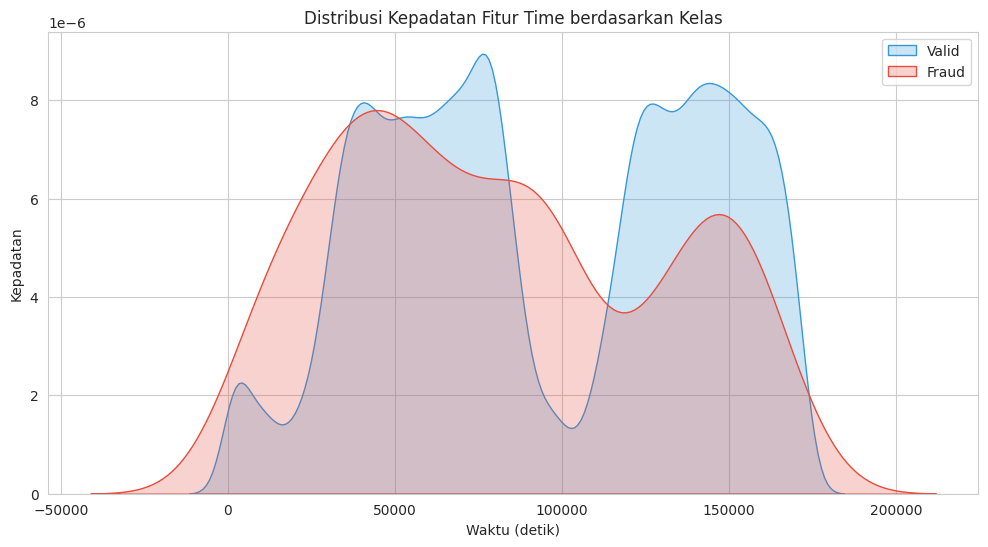

In [ ]:
plt.figure(figsize=(12, 6))

sns.kdeplot(df[df['Class'] == 0]['Time'], label='Valid', fill=True, color='#3498db')
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True, color='#e74c3c')

plt.title('Distribusi Kepadatan Fitur Time berdasarkan Kelas')
plt.xlabel('Waktu (detik)')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

Grafik di atas membandingkan kepadatan distribusi fitur `Time` antara transaksi Valid (biru) dan Fraud (merah). Perbedaan bentuk distribusi ini memberikan *insight* yang sangat berharga.

**Poin-Poin Analisis Kunci:**

1.  **Pola Transaksi Valid (Biru):** Kurva biru menunjukkan **pola bimodal (dua puncak)** yang sangat jelas. Ini sangat mungkin merepresentasikan pola siklus harian (*diurnal pattern*), di mana aktivitas transaksi memuncak pada jam-jam sibuk (dua puncak) dan menurun drastis pada jam-jam sepi (dua lembah, kemungkinan besar tengah malam). Ini adalah cerminan dari perilaku manusia yang normal.

2.  **Pola Transaksi Fraud (Merah):** Sebaliknya, kurva merah **tidak menunjukkan pola bimodal yang sama kuatnya**. Distribusinya terlihat lebih merata. Artinya, frekuensi transaksi fraud relatif lebih konsisten sepanjang waktu, termasuk pada jam-jam sepi di mana jumlah transaksi valid sedang anjlok.

**Kesimpulan & Aksi yang Diperlukan:**

* **Sinyal Prediktif:** Perbedaan pola temporal ini adalah **sinyal prediktif yang kuat**. Model dapat belajar bahwa sebuah transaksi yang terjadi pada waktu yang "tidak biasa" (misalnya, saat aktivitas normal sedang rendah) memiliki probabilitas fraud yang sedikit lebih tinggi.
* **Aksi Wajib:** Sama seperti fitur `Amount`, fitur `Time` memiliki rentang nilai yang sangat besar. Oleh karena itu, langkah *preprocessing* yang **wajib** dilakukan adalah **melakukan scaling** (misalnya dengan `StandardScaler`) agar skalanya sebanding dengan fitur-fitur lainnya.

*Insight* ini memperkuat keputusan kita untuk menggunakan `Time` sebagai fitur penting dan menggarisbawahi perlunya normalisasi skala sebelum melatih model.

Meskipun kita tidak tahu artinya, apakah fitur-fitur ini (V1-V28) menunjukkan perbedaan distribusi antara kelas fraud dan non-fraud

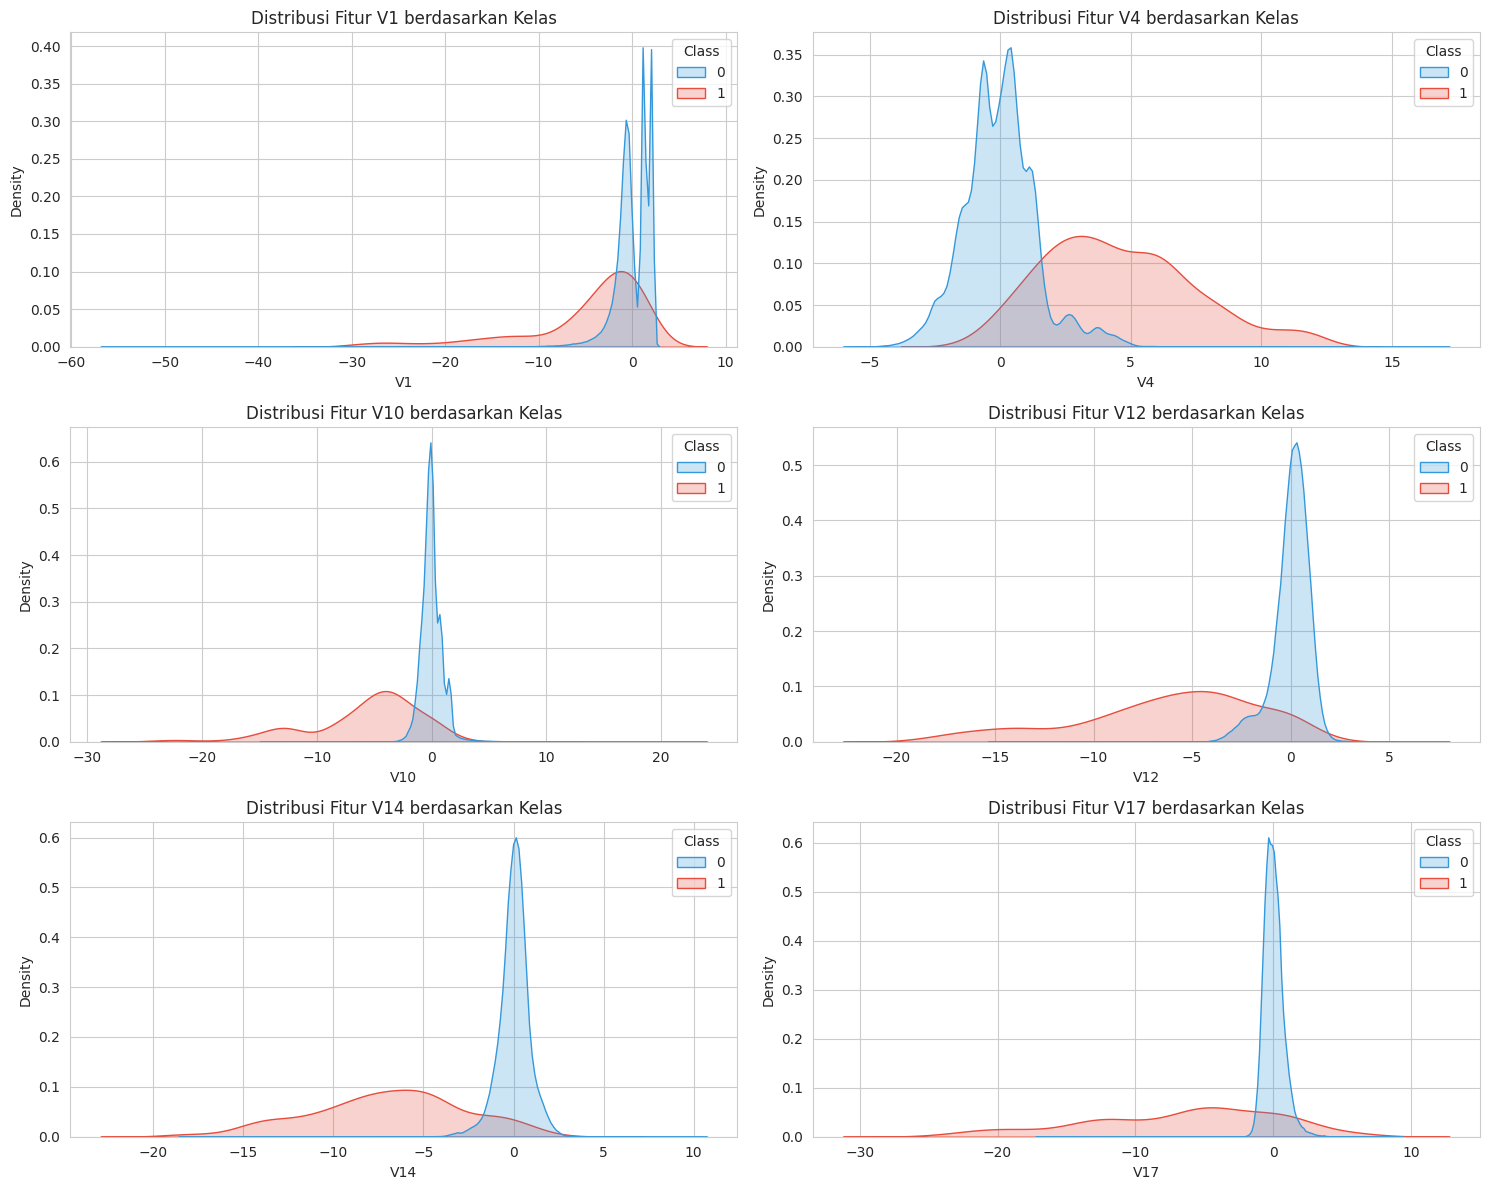

In [ ]:
# Memilih beberapa fitur V untuk dianalisis.
# Kita tidak perlu memplot semua 28 fitur, cukup beberapa untuk melihat polanya.
features_to_plot = ['V1', 'V4', 'V10', 'V12', 'V14', 'V17']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(
        data=df,
        x=feature,
        hue='Class',
        fill=True,
        palette=['#3498db', '#e74c3c'],
        common_norm=False # Penting untuk membandingkan bentuk, bukan jumlah
    )
    plt.title(f'Distribusi Fitur {feature} berdasarkan Kelas')

plt.tight_layout()
plt.show()

Keenam grafik di atas memvisualisasikan distribusi dari sampel fitur-fitur anonim (`V1`, `V4`, `V10`, `V12`, `V14`, `V17`), dengan memisahkannya berdasarkan kelas `Valid` (biru) dan `Fraud` (merah).

**Insight Utama yang Diperoleh:**

1.  **Pola Konsisten:** Terdapat sebuah pola yang sangat konsisten di semua grafik. Distribusi untuk transaksi `Valid` (biru) hampir selalu berupa kurva yang sempit dan runcing, terpusat di sekitar nilai nol. Ini adalah karakteristik yang diharapkan dari data yang telah melalui standardisasi dan PCA.

2.  **Pemisahan Distribusi yang Jelas:** Ini adalah temuan paling krusial. Untuk setiap fitur yang kita amati, distribusi untuk transaksi `Fraud` (merah) **secara signifikan berbeda**. Kurva merah seringkali lebih lebar, memiliki puncak di lokasi yang berbeda, dan sebagian besar massanya terpisah dari kurva biru.

3.  **Contoh Sinyal Paling Kuat:** Fitur seperti **`V10`, `V12`, `V14`, dan `V17`** menunjukkan pemisahan yang sangat ekstrem. Pada fitur-fitur ini, hampir seluruh distribusi kelas `Fraud` berada di luar rentang utama dari kelas `Valid`. Ini adalah sinyal prediktif yang ideal.

**Kesimpulan & Aksi yang Diperlukan:**

* **Insight:** Validasi ini membuktikan bahwa fitur-fitur anonim V1-V28 **sangat informatif** dan memiliki daya diskriminatif (kemampuan membedakan) yang tinggi. Proses PCA yang dilakukan pada dataset asli telah berhasil mengisolasi komponen-komponen yang paling efektif dalam memisahkan kedua kelas.

* **Aksi:** Berdasarkan bukti visual yang kuat ini, kita dapat dengan **keyakinan penuh** untuk memasukkan **seluruh set fitur V (V1-V28)** ke dalam proses pemodelan kita. Tidak ada indikasi perlunya melakukan pemilihan fitur (*feature selection*) pada tahap ini.

Dengan ini, fase Exploratory Data Analysis (EDA) telah selesai. Kita memiliki pemahaman komprehensif tentang tantangan (ketidakseimbangan kelas) dan potensi (semua fitur bersifat prediktif) dari dataset ini, serta rencana aksi yang jelas untuk tahap pra-pemrosesan.

# **5. Data Preprocessing**

Di bagian ini, kita akan menerapkan semua rencana aksi yang telah disusun berdasarkan insight dari fase EDA. Tujuannya adalah untuk mengubah DataFrame mentah kita menjadi set data yang bersih, berskala, dan terstruktur (latih & uji) yang siap untuk dimasukkan ke dalam model machine learning.

In [ ]:
# Membuat salinan dari DataFrame asli. Ini adalah praktik terbaik untuk memastikan
# data mentah kita (df) tetap tidak berubah jika kita perlu kembali atau mencoba pendekatan lain.
df_processed = df.copy()

# Inisialisasi StandardScaler
# StandardScaler akan mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.
scaler = StandardScaler()

# Menerapkan scaler pada kolom 'Amount' dan 'Time'.
# Perhatikan penggunaan .values.reshape(-1, 1). Ini diperlukan karena scaler Scikit-learn
# mengharapkan input berupa data 2D (seperti matriks), sementara df['Amount'] adalah data 1D (Series).
df_processed['scaled_amount'] = scaler.fit_transform(df_processed['Amount'].values.reshape(-1, 1))
df_processed['scaled_time'] = scaler.fit_transform(df_processed['Time'].values.reshape(-1, 1))

# Setelah membuat versi yang sudah di-scale, hapus kolom asli untuk
# menghindari redundansi data dan kebingungan pada model.
df_processed.drop(['Time', 'Amount'], axis=1, inplace=True)

# Verifikasi Hasil
# Meihat 5 baris pertama dari data yang sudah diproses.
# Perhatikan bagaimana kolom 'scaled_amount' dan 'scaled_time' sekarang ada,
# dan kolom 'Time' serta 'Amount' yang asli sudah hilang.
print("Data setelah proses scaling pada fitur 'Time' dan 'Amount':")
display(df_processed.head())

Data setelah proses scaling pada fitur 'Time' dan 'Amount':


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0,0.24,-2.00
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0,-0.34,-2.00
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0,1.16,-2.00
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0,0.14,-2.00
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0,-0.07,-2.00


In [ ]:
# Mendefinisikan X (fitur) dengan menghapus kolom target 'Class'.
# axis=1 memberitahu pandas untuk menghapus sebuah kolom, bukan baris.
X = df_processed.drop('Class', axis=1)

# Mendefinisikan y (target) dengan memilih hanya kolom 'Class'.
y = df_processed['Class']

print("Pemisahan fitur (X) dan target (y) berhasil dilakukan.")

Pemisahan fitur (X) dan target (y) berhasil dilakukan.


In [ ]:
print("Verifikasi Hasil Pemisahan")

# Periksa dimensi (bentuk) dari X dan y
print(f"Dimensi dari X (fitur): {X.shape}")
print(f"Dimensi dari y (target): {y.shape}")
print("\n")

# Tampilkan 5 baris pertama dari X untuk memastikan kolom 'Class' sudah hilang
print("Tampilkan 5 baris pertama dari X (fitur):")
display(X.head())
print("\n")

# Tampilkan 5 baris pertama dari y untuk memastikan hanya berisi target
print("Cuplikan 5 baris pertama dari y (target):")
display(y.head())

Verifikasi Hasil Pemisahan
Dimensi dari X (fitur): (284807, 30)
Dimensi dari y (target): (284807,)


Tampilkan 5 baris pertama dari X (fitur):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0.24,-2.00
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,-0.34,-2.00
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,1.16,-2.00
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0.14,-2.00
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,-0.07,-2.00




Cuplikan 5 baris pertama dari y (target):


,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Membagi data menjadi train, test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # Data fitur dan target yang akan kita bagi
    test_size=0.2,      # Proporsi data yang akan dialokasikan untuk set data uji
    random_state=42,    # Menjamin hasil pembagian yang konsisten dan dapat direproduksi
    stratify=y          # Parameter paling krusial untuk kasus kita
)

print("Pembagian data menjadi set latih dan uji telah berhasil dilakukan.")

Pembagian data menjadi set latih dan uji telah berhasil dilakukan.


In [ ]:
# Verifikasi Verifikasi Hasil Pembagian Data
print("Verifikasi Hasil Pembagian Data")

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")
print("\n")

print("Verifikasi Proporsi Kelas (Stratifikasi)")
print("Proporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Verifikasi Hasil Pembagian Data
Bentuk X_train: (227845, 30)
Bentuk X_test: (56962, 30)
Bentuk y_train: (227845,)
Bentuk y_test: (56962,)


Verifikasi Proporsi Kelas (Stratifikasi)
Proporsi kelas di y_train:
Class
0   1.00
1   0.00
Name: proportion, dtype: float64

Proporsi kelas di y_test:
Class
0   1.00
1   0.00
Name: proportion, dtype: float64


In [ ]:
# Hapus `normalize=True` untuk melihat jumlah data mentah
print("--- Verifikasi Jumlah Absolut ---")

print("Jumlah kelas di y_train:")
print(y_train.value_counts()) # <-- Tanpa normalize=True

print("\nJumlah kelas di y_test:")
print(y_test.value_counts()) # <-- Tanpa normalize=True

--- Verifikasi Jumlah Absolut ---
Jumlah kelas di y_train:
Class
0    227451
1       394
Name: count, dtype: int64

Jumlah kelas di y_test:
Class
0    56864
1       98
Name: count, dtype: int64


In [ ]:
# Tentukan nama direktori untuk menyimpan output kita di lingkungan Colab
output_dir = 'hasil_preprocessing'

# Membuat Direktori dengan Aman
# os.makedirs akan membuat direktori. `exist_ok=True` mencegah error
# jika direktori tersebut kebetulan sudah ada.
os.makedirs(output_dir, exist_ok=True)
print(f"Direktori '{output_dir}' telah disiapkan.")

# Menyimpan Setiap Komponen Data Secara Terpisah dengan Nama yang Jelas

# Menyimpan data fitur dan label untuk set latih dan uji ke file CSV.
# Perhatikan parameter `index=False`. Ini SANGAT PENTING untuk mencegah
# Pandas menulis indeks DataFrame sebagai kolom tambahan di file CSV kita.
X_train.to_csv(os.path.join(output_dir, 'train_features.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'train_labels.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'test_features.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'test_labels.csv'), index=False)

print("Semua set data telah berhasil disimpan sebagai file CSV terpisah.")

Direktori 'hasil_preprocessing' telah disiapkan.
Semua set data telah berhasil disimpan sebagai file CSV terpisah.


In [ ]:
# Verifikasi Operasi File
# Perintah `!ls -lh` adalah perintah shell untuk melihat daftar file
# di dalam sebuah direktori dengan format yang mudah dibaca (ukuran dalam KB, MB, dll).
print(f"Isi dari direktori '{output_dir}':")
!ls -lh {output_dir}

Isi dari direktori 'hasil_preprocessing':
total 151M
-rw-r--r-- 1 root root  31M Jul  4 17:20 test_features.csv
-rw-r--r-- 1 root root 112K Jul  4 17:20 test_labels.csv
-rw-r--r-- 1 root root 121M Jul  4 17:20 train_features.csv
-rw-r--r-- 1 root root 446K Jul  4 17:20 train_labels.csv
